# Exam R



In [21]:
NAME = "W.F.M. van der Meiden, 2014236"
COLLABORATORS = "M.A.H.C.L. van Riel, 2018335"

In [13]:
library(tidyverse)
library(gvlma)

# Assignment 1


## Data

The data are given:


In [14]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

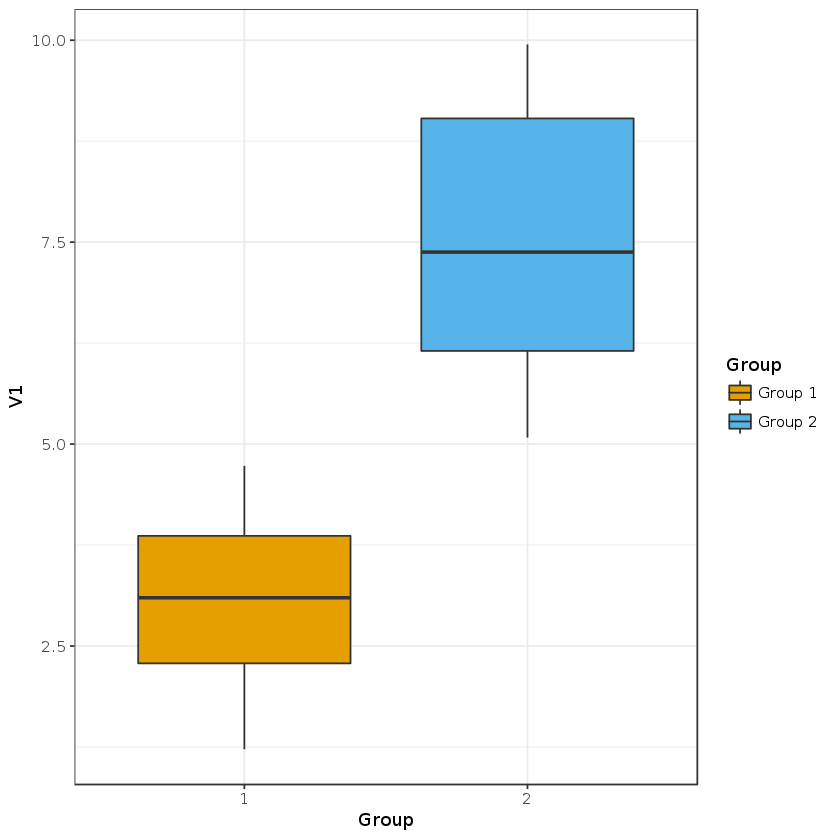

In [15]:
ggplot(df1, aes(factor(group), V1, fill = factor(group))) +
    geom_boxplot() +
    scale_fill_manual(name = "Group",
                      values=c("#E69F00", "#56B4E9"),
                      breaks = c('1', '2'),
                      labels = c('Group 1', 'Group 2')
                     ) +
    xlab('Group') +
    ylab('V1') +
    theme_bw()

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [16]:
reg1 <- lm(data = df1, response ~ V1)
summary(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

In [17]:
gvlma(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Coefficients:
(Intercept)           V1  
      2.630       -1.915  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                      Value p-value                Decision
Global Stat        0.654319  0.9568 Assumptions acceptable.
Skewness           0.002398  0.9609 Assumptions acceptable.
Kurtosis           0.007200  0.9324 Assumptions acceptable.
Link Function      0.005852  0.9390 Assumptions acceptable.
Heteroscedasticity 0.638869  0.4241 Assumptions acceptable.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



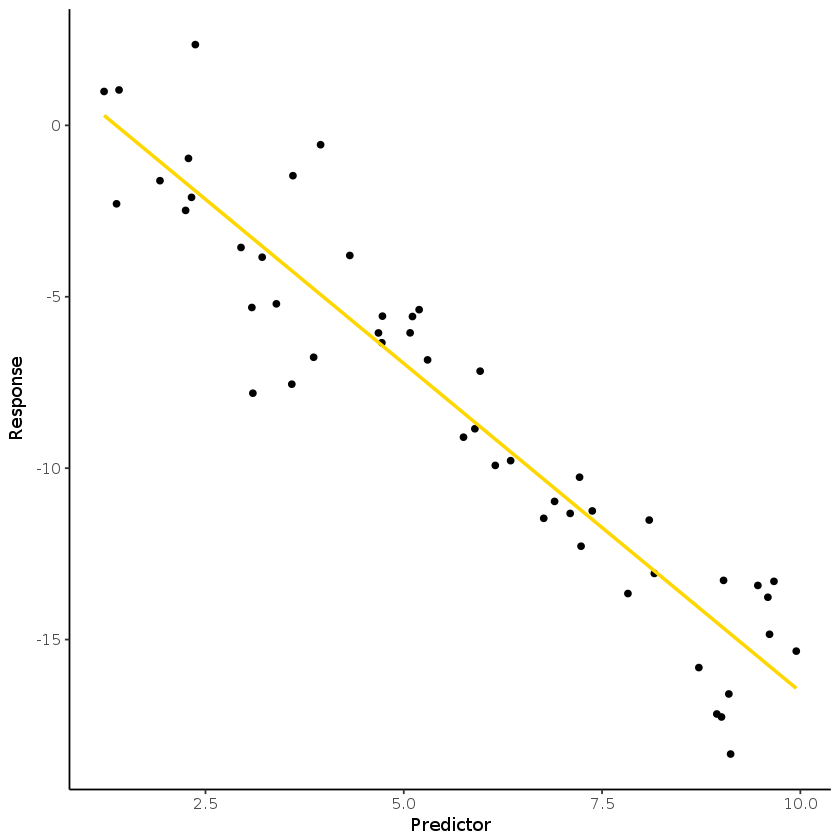

In [19]:
ggplot(df1, aes(V1, response)) +
    geom_point() +
    geom_smooth(method = 'lm', se = FALSE, col = 'gold') +
    xlab("Predictor") +
    ylab("Response") +
    theme_classic()

# Assigment 2

# Packages

In [2]:
library(thematicmaps)
library(tidyverse)

Loading required package: maptools
Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: digest
Loading required package: rgdal
rgdal: version: 1.2-16, (SVN revision 701)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.2, released 2016/10/24
 Path to GDAL shared files: /usr/share/gdal/2.1
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-4 
Loading required package: rgeos
rgeos version: 0.3-26, (SVN revision 560)
 GEOS runtime version: 3.5.1-CAPI-1.9.1 r4246 
 Linking to sp version: 1.2-4 
 Polygon checking: TRUE 

Loading required package: grid


## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [3]:
map_municipal <- read.csv2("/home/u800370/Sourcedata/nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

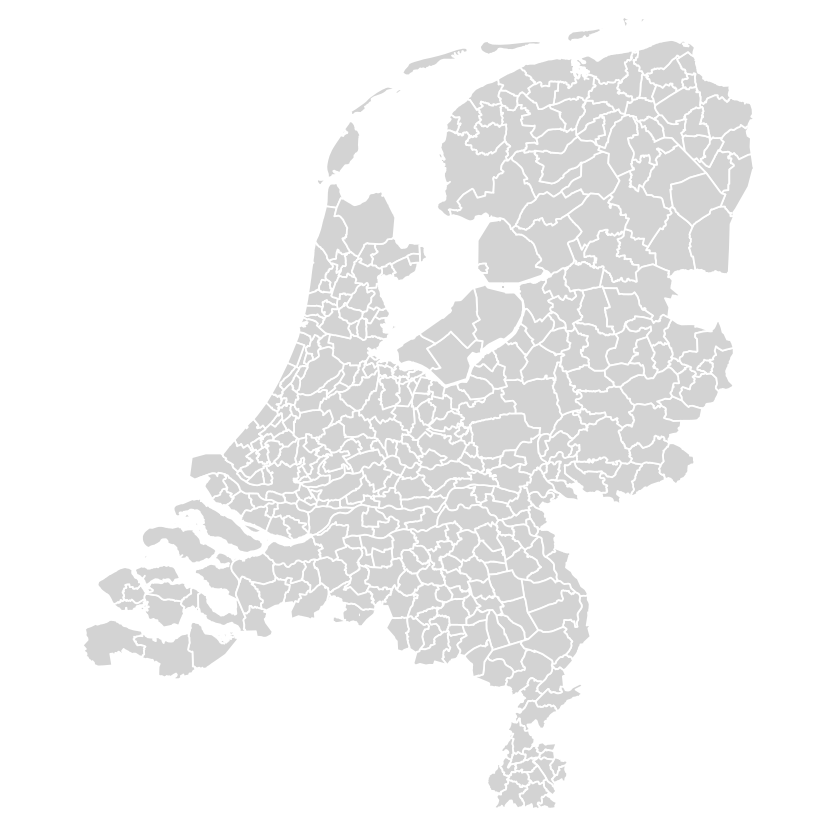

In [4]:
AddMapLayer(MapPlot(), map_municipal)


## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [5]:
pc4_locations <- read.csv2("/home/u800370/Sourcedata/nld_pc4_locations.csv") %>%
    mutate(X=as.numeric(as.character(X))) %>%
    mutate(Y=as.numeric(as.character(Y)))
str(pc4_locations)
head(pc4_locations)



'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


PC4,X,Y
1011,122244.1,487223.1
1012,121612.8,487555.4
1013,120324.5,489671.7
1014,119515.0,489421.7
1015,120740.5,488009.3
1016,120537.8,487075.4


## Assignment 2d

### 2di

Read in the school data


In [6]:
schools <- read.csv2("/home/u800370/Sourcedata/schools.csv", stringsAsFactors = FALSE, dec = ".")

str(schools)

'data.frame':	1603 obs. of  31 variables:
 $ PROVINCIE                                 : chr  "                    " "Drenthe" "Drenthe" "Drenthe" ...
 $ BEVOEGD.GEZAG.NUMMER                      : int  41152 10053 10053 13273 13273 13273 13273 13273 13273 13273 ...
 $ BRIN.NUMMER                               : chr  "23HC" "18BR" "18BR" "20LO" ...
 $ VESTIGINGSNUMMER                          : chr  "23HC04" "18BR00" "18BR01" "20LO00" ...
 $ VESTIGINGSNAAM                            : chr  "RSG Lingecollege" "School voor Praktijkonderwijs Assen" "School voor Praktijkonderwijs Assen" "Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo" ...
 $ STRAATNAAM                                : chr  "                        " "Zwartwatersweg" "Bosrand" "Mr Groen v Prinstererln" ...
 $ HUISNUMMER.TOEVOEGING                     : chr  "            " "202" "2" "98" ...
 $ POSTCODE                                  : chr  "       " "9406 NN" "9401 SL" "9402 KG" ...
 $ PLAATSNAA

### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [7]:
#schools <- tbl_df(schools)
schools1 <- schools %>%
mutate(PC4 = substr(POSTCODE, 1, 4)) %>%
select(PC4, DENOMINATIE)

### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [8]:
pc4_locations <- tbl_df(pc4_locations)
as.character(pc4_locations$PC4)
as.character(schools1$PC4)
df <- merge(pc4_locations, schools1, by = 'PC4')

school_loc <- filter(df, df$DENOMINATIE == "Rooms-Katholiek" | df$DENOMINATIE == "Protestants-Christelijk")

print(as.data.frame(school_loc))









[1] "1011" "1012" "1013" "1014" "1015" "1016" "1017" "1018" "1019" "1021"
  [11] "1022" "1023" "1024" "1025" "1026" "1027" "1028" "1031" "1032" "1033"
  [21] "1034" "1035" "1036" "1037" "1041" "1042" "1043" "1044" "1045" "1046"
  [31] "1047" "1051" "1052" "1053" "1054" "1055" "1056" "1057" "1058" "1059"
  [41] "1060" "1061" "1062" "1063" "1064" "1065" "1066" "1067" "1068" "1069"
  [51] "1071" "1072" "1073" "1074" "1075" "1076" "1077" "1078" "1079" "1081"
  [61] "1082" "1083" "1086" "1087" "1091" "1092" "1093" "1094" "1095" "1096"
  [71] "1097" "1098" "1101" "1102" "1103" "1104" "1105" "1106" "1107" "1108"
  [81] "1109" "1111" "1112" "1113" "1114" "1115" "1117" "1118" "1119" "1121"
  [91] "1127" "1131" "1132" "1135" "1141" "1145" "1151" "1153" "1154" "1156"
 [101] "1161" "1165" "1171" "1175" "1181" "1182" "1183" "1184" "1185" "1186"
 [111] "1187" "1188" "1189" "1191" "1211" "1212" "1213" "1214" "1215" "1216"
 [121] "1217" "1218" "1221" "1222" "1223" "1231" "1241" "1243" "1244" "1251"
 [131] "1252" "1261" "1262" "1271" "1272" "1273" "1274" "1275" "1276" "1277"
 [141] "1309" "1311" "1312" "1313" "1314" "1315" "1316" "1317" "1318" "1319"
 [151] "1321" "1322" "1323" "1324" "1325" "1326" "1327" "1328" "1329" "1331"
 [161] "1332" "1333" "1334" "1335" "1336" "1338" "1339" "1341" "1343" "1349"
 [171] "1351" "1352" "1353" "1354" "1355" "1356" "1357" "1358" "1359" "1361"
 [181] "1362" "1363" "1381" "1382" "1383" "1384" "1391" "1393" "1394" "1396"
 [191] "1398" "1399" "1401" "1402" "1403" "1404" "1405" "1406" "1411" "1412"
 [201] "1421" "1422" "1423" "1424" "1426" "1427" "1428" "1431" "1432" "1433"
 [211] "1435" "1436" "1437" "1438" "1441" "1442" "1443" "1444" "1445" "1446"
 [221] "1447" "1448" "1451" "1452" "1454" "1456" "1458" "1461" "1462" "1463"
 [231] "1464" "1471" "1472" "1473" "1474" "1475" "1476" "1477" "1481" "1482"
 [241] "1483" "1484" "1485" "1486" "1487" "1488" "1489" "1501" "1502" "1503"
 [251] "1504" "1505" "1506" "1507" "1508" "1509" "1511" "1521" "1525" "1531"
 [261] "1534" "1536" "1541" "1544" "1546" "1551" "1561" "1562" "1566" "1567"
 [271] "1601" "1602" "1606" "1607" "1608" "1609" "1611" "1613" "1614" "1616"
 [281] "1617" "1619" "1621" "1622" "1623" "1624" "1625" "1627" "1628" "1631"
 [291] "1633" "1634" "1636" "1641" "1642" "1643" "1645" "1646" "1647" "1648"
 [301] "1652" "1654" "1655" "1657" "1658" "1661" "1662" "1663" "1671" "1674"
 [311] "1676" "1678" "1679" "1681" "1682" "1683" "1684" "1685" "1686" "1687"
 [321] "1688" "1689" "1691" "1692" "1693" "1695" "1696" "1697" "1701" "1702"
 [331] "1703" "1704" "1705" "1706" "1711" "1713" "1715" "1716" "1718" "1719"
 [341] "1721" "1722" "1723" "1724" "1731" "1732" "1733" "1734" "1735" "1736"
 [351] "1738" "1741" "1742" "1744" "1746" "1747" "1749" "1751" "1752" "1753"
 [361] "1754" "1755" "1756" "1757" "1759" "1761" "1764" "1766" "1767" "1768"
 [371] "1769" "1771" "1773" "1774" "1775" "1777" "1778" "1779" "1781" "1782"
 [381] "1783" "1784" "1785" "1786" "1787" "1788" "1789" "1791" "1792" "1793"
 [391] "1794" "1795" "1796" "1797" "1811" "1812" "1813" "1814" "1815" "1816"
 [401] "1817" "1821" "1822" "1823" "1824" "1825" "1826" "1827" "1829" "1831"
 [411] "1832" "1834" "1841" "1842" "1843" "1844" "1846" "1847" "1851" "1852"
 [421] "1853" "1861" "1862" "1865" "1871" "1873" "1901" "1902" "1906" "1911"
 [431] "1921" "1931" "1934" "1935" "1941" "1942" "1943" "1944" "1945" "1946"
 [441] "1947" "1948" "1949" "1951" "1961" "1962" "1963" "1964" "1965" "1966"
 [451] "1967" "1968" "1969" "1971" "1972" "1973" "1974" "1975" "1976" "1981"
 [461] "1985" "1991" "1992" "2011" "2012" "2013" "2014" "2015" "2019" "2021"
 [471] "2022" "2023" "2024" "2025" "2026" "2031" "2032" "2033" "2034" "2035"
 [481] "2036" "2037" "2041" "2042" "2051" "2061" "2063" "2064" "2065" "2071"
 [491] "2082" "2101" "2102" "2103" "2104" "2105" "2106" "2111" "2114" "2116"
 [501] "2121" "2131" "2132" "2133" "2134" "2135" "2136" "2141" "2142" "2143"
 [511] "2144" "2151" "2152" "2153" "2154" "2155" "2156" "2157" "2158" "2159"

[1] "    " "9406" "9401" "9402" "9331" "9411" "9461" "9402" "9402" "9403"
  [11] "9406" "7905" "7905" "7905" "7905" "7905" "9404" "9761" "7812" "7944"
  [21] "7944" "7824" "9301" "9301" "7902" "7903" "7822" "7825" "7943" "7943"
  [31] "7943" "7981" "7943" "7742" "9402" "7822" "7891" "7822" "7811" "7861"
  [41] "9531" "7822" "9471" "7941" "7941" "9406" "9405" "9404" "9411" "9422"
  [51] "7944" "8251" "8251" "8251" "8251" "3891" "8225" "8322" "1333" "1335"
  [61] "1335" "8321" "8303" "8303" "8232" "1362" "3891" "8302" "8302" "8302"
  [71] "8302" "8304" "8251" "8251" "8251" "8224" "8223" "8233" "1324" "1326"
  [81] "1325" "1314" "1353" "1363" "1323" "1356" "1336" "1329" "8302" "8302"
  [91] "8302" "8321" "1314" "1325" "1324" "1363" "1362" "9163" "8891" "8899"
 [101] "9201" "9251" "9231" "9201" "9202" "9202" "9251" "9201" "8935" "9291"
 [111] "8911" "8931" "8924" "8915" "8915" "9076" "9103" "8924" "8935" "8925"
 [121] "8862" "8801" "8862" "8471" "9285" "8602" "8448" "8934" "8608" "9285"
 [131] "9291" "9103" "9101" "9101" "9172" "9101" "8601" "8601" "8601" "8723"
 [141] "8731" "8561" "8701" "8701" "9202" "9202" "9251" "8434" "9202" "9251"
 [151] "8446" "8446" "8447" "8503" "8802" "8531" "8561" "8472" "9076" "8933"
 [161] "8921" "8924" "9076" "8933" "8924" "8932" "8601" "8601" "8602" "8431"
 [171] "8861" "8446" "8441" "8441" "8446" "8503" "9001" "8441" "8401" "9203"
 [181] "8924" "8601" "9101" "9254" "9104" "9166" "6922" "6922" "6922" "6832"
 [191] "6832" "6942" "6843" "6904" "6942" "6902" "6903" "6828" "6835" "6661"
 [201] "6835" "6661" "6846" "6824" "6822" "6812" "6883" "6825" "6827" "6706"
 [211] "6706" "4041" "6709" "4103" "4103" "4103" "4103" "4191" "3844" "7206"
 [221] "7201" "7314" "7312" "7322" "7391" "7322" "7312" "4041" "6532" "7141"
 [231] "7131" "3842" "6865" "7152" "7161" "7161" "6823" "6523" "6562" "6523"
 [241] "6717" "6717" "6717" "6825" "7231" "7231" "6717" "6717" "3862" "6881"
 [251] "4102" "4102" "8181" "6891" "6953" "6952" "7005" "7271" "7391" "7005"
 [261] "4006" "4001" "4001" "4001" "3842" "3844" "3842" "3843" "6543" "6681"
 [271] "6602" "6524" "7329" "7314" "7313" "7312" "6522" "6533" "6532" "6537"
 [281] "6533" "6535" "6533" "6524" "6525" "6525" "6603" "6602" "6541" "6541"
 [291] "6651" "6658" "6651" "6511" "6531" "6546" "6546" "6663" "6663" "3863"
 [301] "3863" "3863" "6822" "6883" "6826" "6826" "6883" "6826" "8091" "6671"
 [311] "6681" "6661" "6851" "6681" "6661" "3771" "3771" "3772" "7333" "5301"
 [321] "3844" "3871" "4041" "3772" "6717" "7316" "7329" "7316" "7331" "7316"
 [331] "7316" "5301" "5301" "3771" "3772" "7241" "7271" "7271" "8162" "8162"
 [341] "6715" "7122" "7091" "7101" "7122" "7002" "7251" "7251" "7002" "7008"
 [351] "7001" "7008" "7204" "7064" "7064" "7071" "7102" "7101" "7009" "7201"
 [361] "7203" "7204" "7206" "7204" "7003" "7161" "7102" "8082" "8081" "8071"
 [371] "8081" "4191" "3851" "3881" "6574" "7331" "6713" "6713" "7201" "7204"
 [381] "7204" "7316" "3888" "7316" "9646" "9641" "9641" "9646" "9989" "9964"
 [391] "9981" "9725" "9951" "9821" "9951" "9843" "9727" "9751" "9503" "9675"
 [401] "9641" "9501" "9675" "9591" "9502" "9501" "9501" "9731" "9726" "9732"
 [411] "9743" "9951" "9602" "9721" "9351" "9351" "9861" "9351" "9675" "9671"
 [421] "9665" "9695" "9946" "9671" "9673" "9675" "9675" "9721" "9801" "9741"
 [431] "9731" "9721" "9721" "9561" "9561" "9741" "9743" "9713" "9732" "9711"
 [441] "9711" "9711" "9731" "9731" "9732" "9722" "9751" "9751" "9721" "9721"
 [451] "9603" "9601" "9902" "9932" "9628" "9902" "9901" "5963" "6042" "6415"
 [461] "6031" "6045" "5911" "5912" "5922" "6134" "6137" "6131" "6163" "6165"
 [471] "6135" "6137" "6135" "6163" "6121" "6135" "6135" "6135" "6045" "6042"
 [481] "6043" "6043" "6042" "6071" "5953" "6101" "6101" "6085" "6093" "6591"
 [491] "6584" "6271" "6417" "6417" "6006" "6004" "6006" "6413" "6431" "6413"
 [501] "6415" "6432" "6431" "6004" "6004" "6443" "6164" "6231" "6301" "6216"
 [511] "6301" "6171" "5981" "5802" "5961" "5963" "6216" "6228" "6226" "6225"

     PC4         X        Y             DENOMINATIE
1   1065 116701.25 485645.8 Protestants-Christelijk
2   1071 120223.02 485571.3         Rooms-Katholiek
3   1077 120152.67 484262.8 Protestants-Christelijk
4   1077 120152.67 484262.8         Rooms-Katholiek
5   1081 118277.65 482449.5 Protestants-Christelijk
6   1132 132947.19 501873.0         Rooms-Katholiek
7   1132 132947.19 501873.0         Rooms-Katholiek
8   1185 118214.36 478212.6 Protestants-Christelijk
9   1185 118214.36 478212.6         Rooms-Katholiek
10  1211 140459.14 470645.8         Rooms-Katholiek
11  1211 140459.14 470645.8         Rooms-Katholiek
12  1212 141853.74 469786.9         Rooms-Katholiek
13  1212 141853.74 469786.9         Rooms-Katholiek
14  1212 141853.74 469786.9         Rooms-Katholiek
15  1213 140219.82 468394.2         Rooms-Katholiek
16  1213 140219.82 468394.2         Rooms-Katholiek
17  1215 139155.68 469643.8 Protestants-Christelijk
18  1217 139160.41 472396.9 Protestants-Christelijk
19  1221 141

## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


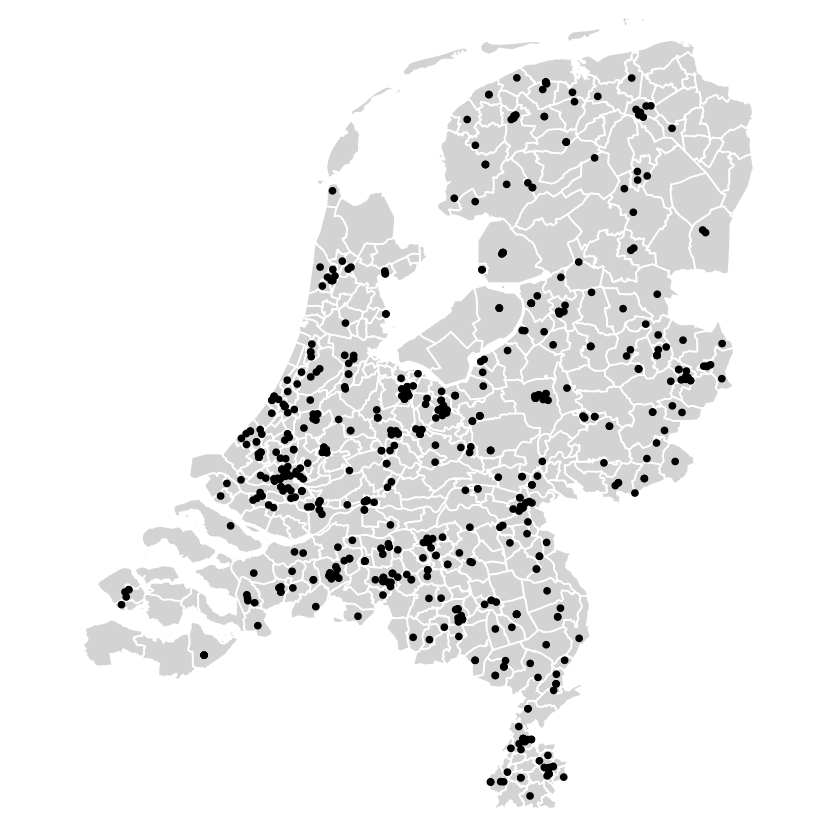

In [10]:
sample_color <- school_loc %>%
    mutate (Type = as.factor(sample(1:3, 596, replace = TRUE))) %>%
    select(PC4, DENOMINATIE)

AddMapLayer(MapPlot(), map_municipal) %>%
    AddPointsLayer(school_loc)

End of notebook